# Homework Assignment #4 (Individual)
## Graph theory and Regression models

### <p style="text-align: right;"> &#9989; Ted Zimbo</p>
### <p style="text-align: right;"> &#9989; zimbot13</p>

<img src="http://blogs.acu.edu/coba/files/2016/12/ncaa-football-diagram-490x376.jpg" width=400px align="right" style="margin-left: 20px" alt="Image credit: https://blogs.acu.edu/">

### Goal for this homework assignment
By now, you have learned a bit about graph theory and regression models. In this assignment, you will practice:

* Building and analyzing a directed graph
* Performing linear regression
* Performing multiple regression
* Exploring the nature of overfitting data

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, November 12.** It should be uploaded into the "Homework Assignments" submission folder for Homework #4.  Submission instructions can be found at the end of the notebook. **There are 57 standard points possible in this assignment with 8 additional bonus points possible. The distribution of points can be found in the section headers**.


---
## Part 1: Add to your Git repository to track your progress on your assignment (2 points)

As usual, for this assignment, you're going to add it to the `cmse202-f21-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-f21-turnin` repository and create a new directory called `hw-04`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
3. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Make sure you've added your Professor and your TA as collaborators to your "turnin" respository with "Read" access so that we can see your assignment (you should have done this in the previous homework assignment)

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f21-turnin`" repository inside the `hw-04` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

&#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

``` bash
# Put the command for cloning your repository here!
git clone https://github.com/zimbot13/cmse202-f21-turnin
```

---
## Part 2: Add a README file to your repository (2 points)

If you've been keeping up with this class, your `cmse202-f21-turnin` repository should now have a lot of files. Repositories with a large number of files can be confusing to anyone who happens to stumble across it. As such, many GitHub repositories have README files which give a summary of the repository's content. 

&#9989; **Do this**: Create a new file called `README.md` in the main `cmse202-f21-turnin` directory. Edit the `README.md` file with information describing this repository and what files are currently in it (including this notebook). Add `README.md` to your git repository. When you go to your GitHub repository on the web, you should see this README markdown file rendered on the "home page" of your repository.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Part 2 complete", and push the changes to GitHub.

---

---
## Part 3: Graph theory for Sports (24 points)

In this part of the homework, we will look at data from all NCAA football games between teams in Division I-A during the first nine weeks of the 2021 season. We will model this as a directed graph where each team is a node, and for every game we will put a directed edge from the winning team to the losing team. 

*Technical notes*: For purposes of this homework problem, we are ignoring all games in which one or both teams are in divisions below I-A. We are also ignoring any games that happen after this homework was released. Also, `"Hawaii"` has played and beaten `"New Mexico St."` twice this season, but this shouldn't drastically affect any of what you'll need to do in this problem.

&#9989;  **Question 3.1 (3 points)**: For convenience, you are provided with a file called `NCAA_Football_Scores_2021.csv`, which you can download from here: 

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F21-data/main/data/NCAA_Football_Scores_2021.csv`

Each row contains the final score from one game. The first and third columns contain the names of the "away team" and the "home team" respectively. The second and fourth columns contain the number of points that the "away team" and the "home team" scored respectively. 

**Do This:** Load the data in this file into a `Pandas` dataframe, and **give the columns appropriate titles**. Display the first few and last few rows of the dataframe. You may also display the 429th row (0-indexed) if it makes you happy, but this is optional.

In [6]:
# Put your code for Question 3.1 here:
import pandas as pd
ncaa = pd.read_csv('NCAA_Football_Scores_2021.csv',names = ['Away Team', 'Away Score', 'Home Team', 'Home Score'])
print(ncaa.head())
print(ncaa.tail())

  Away Team  Away Score       Home Team  Home Score
0  Nebraska          22        Illinois          30
1     UConn           0      Fresno St.          45
2    Hawaii          10            UCLA          44
3      UTEP          30  New Mexico St.           3
4  Ohio St.          45       Minnesota          31
      Away Team  Away Score            Home Team  Home Score
469   Boise St.          28         Colorado St.          19
470     Arizona          34  Southern California          41
471  Louisville          13             NC State          28
472        UCLA          24                 Utah          44
473  Washington          20             Stanford          13


&#9989;  **Question 3.2 (5 points)**: Next, you will represent this data by creating a `DiGraph` object from the `networkx` package. For each row, add a directed edge from the node corresponding to the team with the larger score to the node corresponding to the team with the smaller score. 

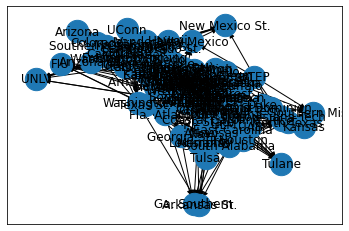

In [25]:
# Put your code for Question 3.2 here: 
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
g = []
for index, row in ncaa.iterrows():
    if(row[1] > row [3]):
        g.append((row[0], row[2]))
    else:
        g.append((row[2], row[0]))
G.add_edges_from(g)


pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.show()

This graph has over 100 nodes, so it will be hard to look at the entire graph at once. But you can display a subgraph of the entire directed graph by running the cell below this one (**note**: you'll need to replace the "`G`" variable with whatever you called your `DiGraph` obejct). You should get an output that is similar to this. 

<img src="https://i.ibb.co/w4LPvps/big-ten-digraph.png" alt="Big Ten Subgraph of Digraph" border="0">

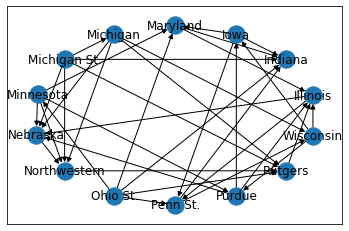

In [20]:
# DO NOT EDIT THIS CELL except for replacing the variable "G" with whatever you called your DiGraph object
BigTen = {"Illinois":(0.97,0.22),"Indiana":(0.78,0.62),"Iowa":(0.43,0.90),"Maryland":(0.00,1.00),"Michigan":(-0.43,0.90),
          "Michigan St.":(-0.78,0.62),"Minnesota":(-0.97,0.23),"Nebraska":(-0.98,-0.22),"Northwestern":(-0.78,-0.62),
          "Ohio St.":(-0.43,-0.90),"Penn St.":(0.00,-1.00),"Purdue":(0.43,-0.90),"Rutgers":(0.78,-0.62),"Wisconsin":(0.97,-0.23)}
G_BigTen = G.subgraph(BigTen.keys())
nx.draw_networkx(G_BigTen,pos=BigTen)
# DO NOT EDIT THIS CELL except for replacing the variable "G" with whatever you called your DiGraph object

&#9989;  **Question 3.3 (6 points)**: For each of the following questions, write code in the cells below that will display the answer to the question when run. These questions can all be answered by a very short amount of code by accessing some of the attributes and methods from the `DiGraph` object you created. If you get stuck, look through the [`networkx` `DiGraph` documentation](https://networkx.org/documentation/stable/reference/classes/digraph.html) and/or think carefully about how teams and game results are represented in the `DiGraph` object.

**a (1 point)**. What is total number of Division I-A teams? (**note**: all of the teams in this dataset are Divison 1-A teams)

**b (1 point)**. How many games has `"UCLA"` played against other Division I-A teams?

**c (1 point)**. How many games has `"Michigan St."` won against other Division I-A teams?

**d (1 point)**. How many games has `"Michigan St."` lost against other Division I-A teams?

**e (1 point)**. True or False?: `"Georgia Tech"` beat `"North Carolina"` this season. 

**f (1 point)**. Which teams have no wins against other Division I-A teams?

In [24]:
# Question 3.3.a: What is total number of Division I-A teams?
G.number_of_nodes()

130

In [26]:
# Question 3.3.b: How many games has `"UCLA"` played against other Division I-A teams?
G.degree('UCLA')

9

In [33]:
# Question 3.3.c: How many games has `"Michigan St."` won against other Division I-A teams?
G.out_degree("Michigan St.")

7

In [34]:
# Question 3.3.d: How many games has `"Michigan St."` lost against other Division I-A teams?
G.in_degree('Michigan St.')

0

In [51]:
# Question 3.3.e: True or False?: `"Georgia Tech"` beat `"North Carolina"` this season. 
l = list(G.out_edges('Georgia Tech'))
b = 0
for i in l:
    if 'North Carolina' in i:
        b = 1
print(bool(b))

True


In [55]:
# Question 3.3.f: Which teams have no wins against other Division I-A teams?
l = []
for n in G.out_degree():
    if(n[1] == 0):
        l.append(n[0])
print(l)

['UConn', 'New Mexico St.', 'Tulane', 'Southern Miss.', 'Arizona', 'Kansas', 'UNLV', 'Arkansas St.', 'FIU']


&#9989;  **Question 3.4 (6 points)**: Make three histograms for the following: 

1. The total number of games each Division I-A team has played against other Division I-A teams, 
2. The total number of wins each Division I-A team has against other Division I-A teams,
3. The total number of losses each Division I-A team has against other Division I-A teams.

Don't forget to use appropriate bin sizes, give each histogram appropriate title and axis labels.

<AxesSubplot:xlabel='Team'>

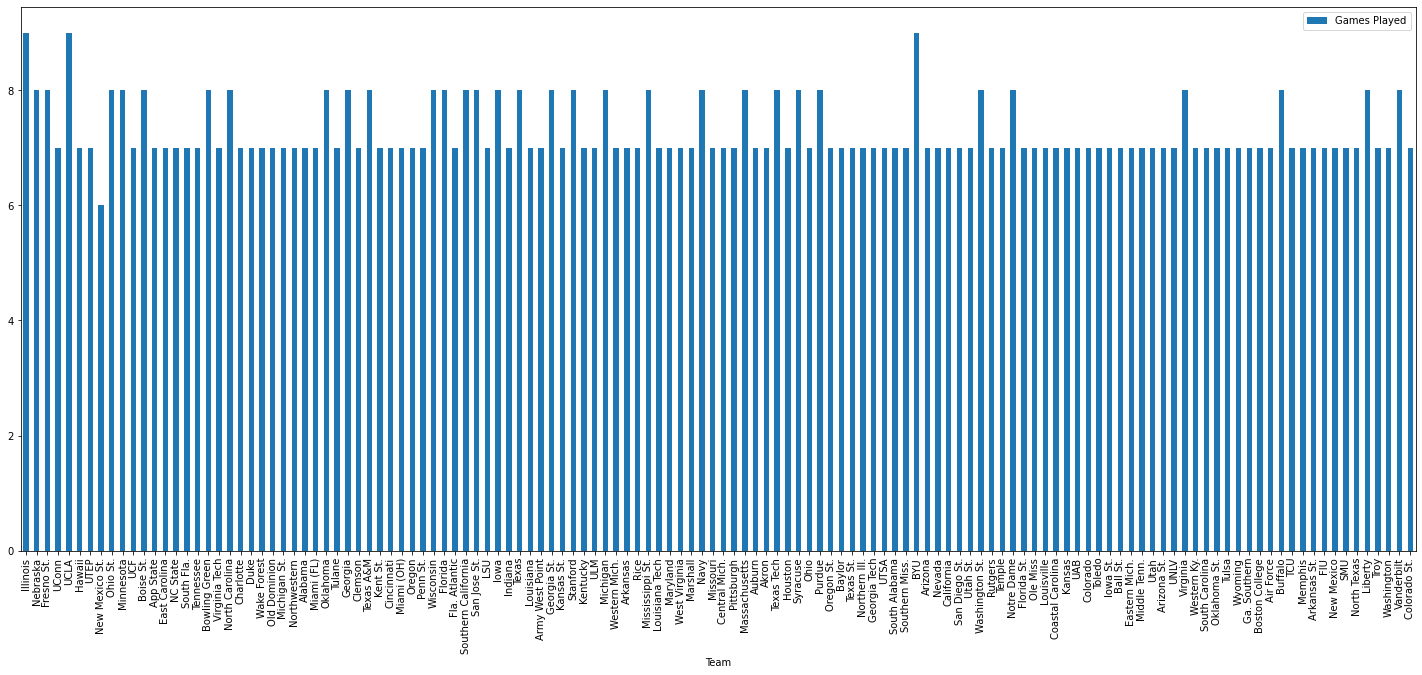

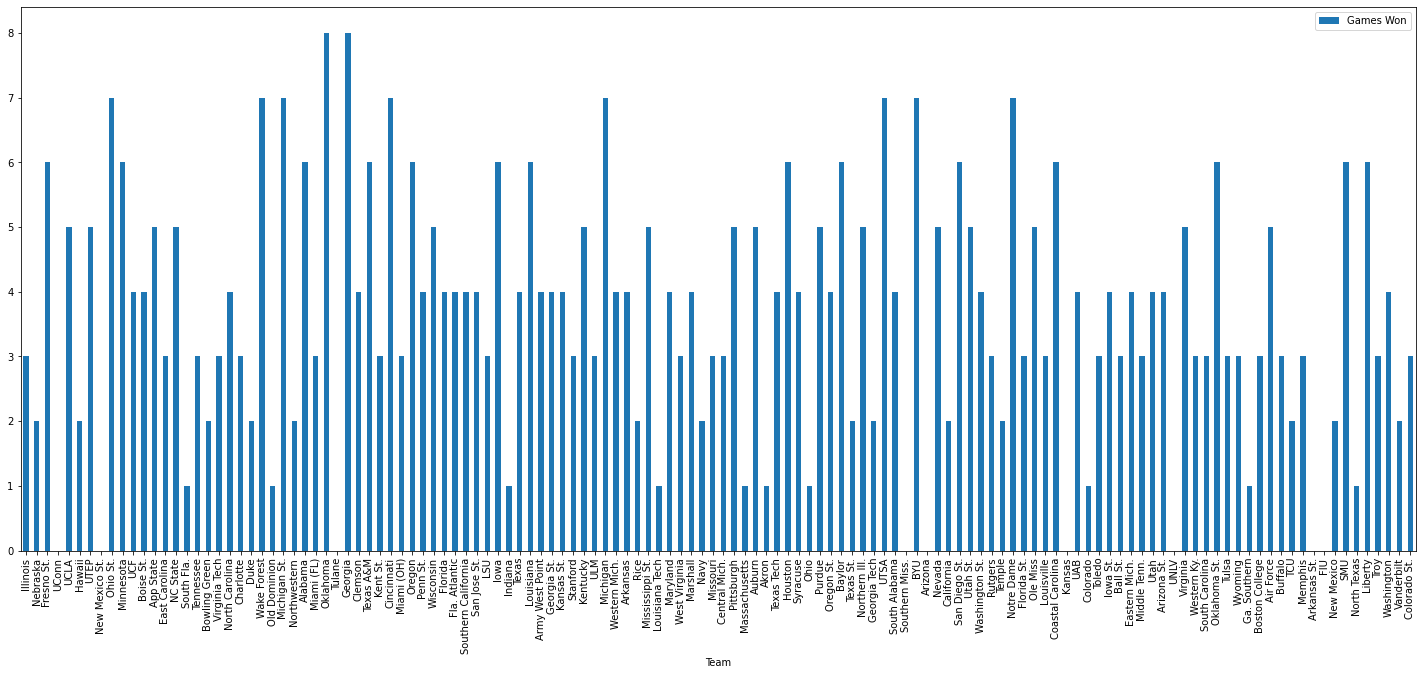

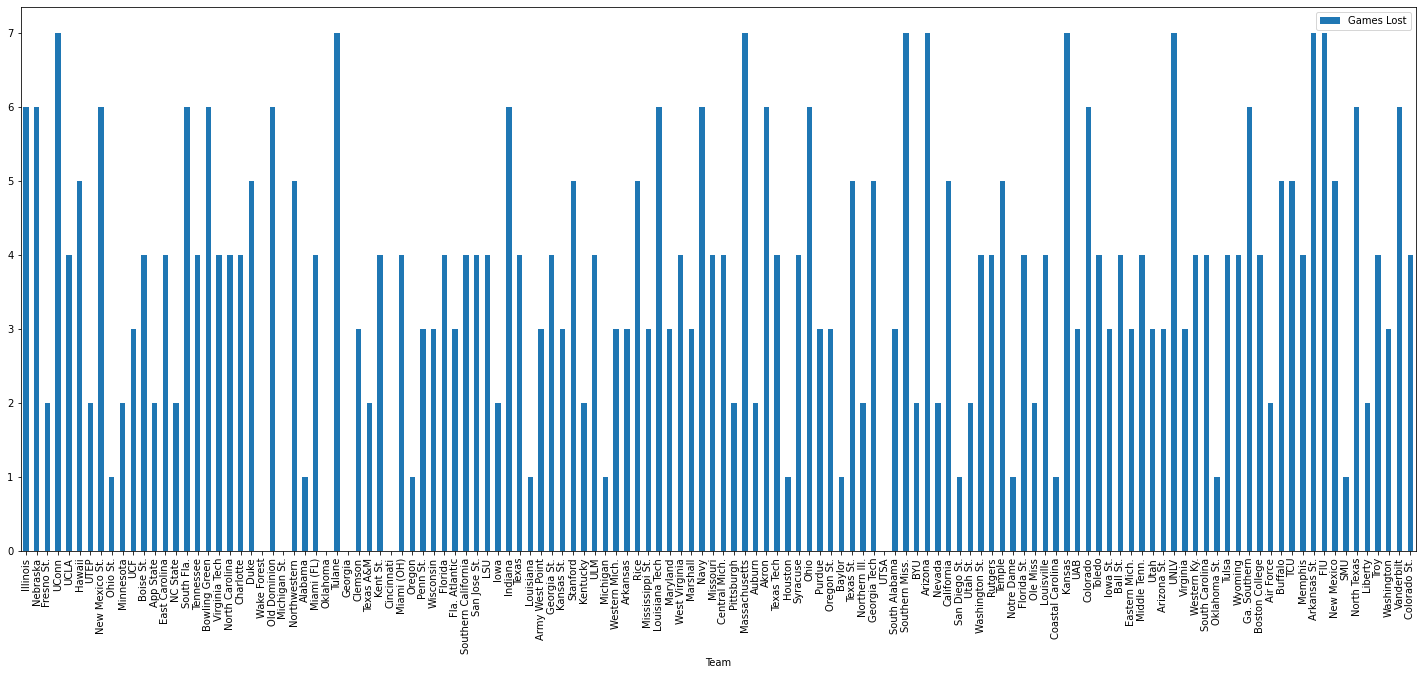

In [66]:
# Put your code for Question 3.4 here. You may add extra cells between this cell and Question 3.5 if you need to.
l = G.degree()
df = pd.DataFrame(l, columns=['Team', 'Games Played'])
df.plot.bar(x='Team',y='Games Played',figsize=[25,10])


l = G.out_degree()
df = pd.DataFrame(l, columns=['Team', 'Games Won'])
df.plot.bar(x='Team',y='Games Won',figsize=[25,10])

l = G.in_degree()
df = pd.DataFrame(l, columns=['Team', 'Games Lost'])
df.plot.bar(x='Team',y='Games Lost',figsize=[25,10])

&#9989;  **Question 3.5 (4 points)**: There are over 100 college football teams in Division I-A, but each team only gets to play a small subset of the other teams. However, fans still want to be able to brag that their team is better than another team, even if these teams haven't played each other. One way to do this is using the "transitive property". For example, if Team A beat Team B and Team B beat Team C, then Team A's fans can make the argument that "Since Team A beat Team B, Team A must be better than Team B. Similarly, since Team B beat Team C, Team B must be better than Team C. Therefore, Team A must be better than Team C." 

This isn't a perfectly logical argument due to the fact that there is some luck in sports, and so the "better" team doesn't always win. To further demonstrate why the above reasoning is not sound, in a single season there can be many instances where Team A beats Team B, Team B beats Team C, and Team C beats Team A. By using the transitive property, the fanbases of all three teams can then argue that their team is better than a team they lost to. Nonetheless, arguments about sports are often not based on logic. :P

Naturally, we can extend this "transitive property"-based reasoning to longer chains of comparisons. In general, if Team $A_{k-1}$ beat Team $A_k$ for $k = 1,\ldots,n$, then Team $A_0$'s fans can claim that Team $A_0$ is better than Team $A_n$. The website https://www.myteamisbetterthanyourteam.com/ helps fans find a chain of comparisons to claim that their team is better than someone else's team. 

**Do this**: In the cell below, create a function called `find_comparison_chain` which takes as inputs (1) the `DiGraph` object you created earlier, (2) a string called `my_team`, and (3) a string called `their_team`, and prints a chain of statements of the form "[TEAM NAME] beat [TEAM NAME]" which can be used to argue that `my_team` is better than `their team` (assuming such a chain exists). Then test your method out by running the code cell after the next cell.

*Hint*: there is a simple `networkx` method that can help you with this task of finding this path through your network. 

In [79]:
# Put your code for Question 3.5 here
def find_comparison_chain(G,my_team,their_team):
    p = nx.shortest_path(G,my_team,their_team)
    if p:
        print(my_team,"is better than",their_team,'because...')
        for i in range(len(p)-1):
            print(p[i],'beat',p[i+1])
find_comparison_chain(G,"Michigan St.",'Penn St.')

Michigan St. is better than Penn St. because...
Michigan St. beat Rutgers
Rutgers beat Illinois
Illinois beat Penn St.


**Do This**: Run the cell below to test your `find_comparison_chain` method. The first few lines of the output should look something like this:

Michigan St. is better than Penn St. because ...  
Michigan St. beat Rutgers  
Rutgers beat Illinois  
Illinois beat Penn St. 

Note: It is ok if your `find_comparison_chain` method finds a different, but correct chain of comparisons than what is shown above.

In [ ]:
# DO NOT EDIT THIS CELL except for replacing the variable "G" with whatever you called your DiGraph object
print("Michigan St. is better than Penn St. because ...")
find_comparison_chain(G,"Michigan St.","Penn St.")
print("\nMichigan St. is better than Ohio St. because ...")
find_comparison_chain(G,"Michigan St.","Ohio St.")
print("\nLouisiana Tech is better than Alabama because ...")
find_comparison_chain(G,"Louisiana Tech","Alabama")
print("\nAlabama is better than Louisiana Tech because ...")
find_comparison_chain(G,"Alabama","Louisiana Tech")
# DO NOT EDIT THIS CELL except for replacing the variable "G" with whatever you called your DiGraph object

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Part 3 complete", and push the changes to GitHub.

---

---
## Part 4: Regression models and Moore's Law (20 points)

Integrated circuits (ICs) are chips which contain many small electronic components called transistors. Over the years, improvements in IC fabrication processes have allowed manufacturers to make transistors smaller, and thus, put more transistors on a single IC chip. In general, the more transistors that an IC has, the more powerful it is. In 1975, Gordon Moore predicted that the number of transistors on an IC would double in size every two years. This prediction has become known as "Moore's Law". In this problem, we will use data from Wikipedia to analyze how true this prediction was.

&#9989; **Question 4.1 (2 points)** The Wikipedia article https://en.wikipedia.org/wiki/Transistor_count#Microprocessors has a table with almost 200 rows. Each row contains information about a single processor. For your convenience, we have cleaned up that table into a more usable file, which you can download here: 

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F21-data/main/data/microprocessor_data.csv`

Using Pandas or any other Python tool, load the data into Python and display the first few and last few rows.

In [ ]:
# Put your code for Question 4.1 here


&#9989; **Question 4.2 (3 points)**: In the data table you read in, there should be a column titled "Date of Introduction" which has the year each processor was introduced as well as a column titled "Number of Transistors" which has the number of transistors in that processor. Make a scatterplot with the number of transistors on the y-axis, and the date of introduction on the x-axis. Be sure to give your plot a title and label your axes.

In [ ]:
# Put your code for Question 4.2 here


### Looking for a linear relationship

Moore's Law states that the number of transistors $N$ should grow exponentially with time $t$, i.e. $N = N_02^{rt}$ for some constants $N_0$ and $r$. Suppose we wish to use linear regression to determine if the exponential growth rate of the number of transistors is consistent with the rate predicted by Moore's law, i.e., the number of transistors doubles every two years. In order to do this, we'd need to transform the exponential equation to some new form that has a linear relationship with $t$.

We can do this by taking the base-2 logarithm of both sides of the exponential equation to obtain:

$$log_2 N = rt + log_2 N_0$$

which now has the form we're used to: $y = mx + b$, which we can fit a line to. With this transformed equation:

* The dependent variable, $y$, is $log_2 N$
* The independent variable, $x$, in this case is the time, $t$, in years.
* The slope, $m$, is $r$
* And the y-intercept, $b$, is $log_2 N_0$

&#9989; **Question 4.3 (4 points)**: Make a scatter plot with the $log_2$ of the number of transistors, $N$, on the y-axis and the date of introduction $t$ on the x-axis. Again, be sure to give your plot a title and label your axes.  

In [ ]:
# Put your code for Question 4.3 here


&#9989; **Question 4.4 (4 points)**: First, visually check your plot from Question 4.3 to make sure that the $log_2$-transformed number of transistors appears to have a linear relationship with the date of introduction $t$. Then, using any method you'd like, perform ordinary least squares (OLS) regression on the transformed number of transistors versus the date of introduction $t$. Display the slope and intercept of the best fit linear model.

In [ ]:
# Put your code for Question 4.4 here


&#9989; **Question 4.5 (4 points)**: Based on your best fit linear model from Question 4.4, how many years does it take for the number of transistors in a processor to double? Explain how you calculated the answer to that question. How close is your answer to what Moore's Law predicts?

<font size=+3>&#9998;</font> Answer Question 4.5 here:

---
## Part 5: The danger of overfitting data (12 points + 8 bonus points; maximum 5% bonus possible on entire assignment)

In the Day-15 PCA, you generated a synthetic dataset consisting of points $(x_1,y_1),\ldots,(x_n,y_n)$ by picking $x_1,\ldots,x_n$ over the range $[-4,4]$, and then setting $y_i = f(x_i)+\text{noise}$ where $f(x)$ was a degree-$4$ polynomial. For $d = 1,\ldots,10$, you then computed the best-fit polynomial $p_d(x)$ of degree $\le d$ to the data points using the `OLS` method in the `statsmodels` package. You probably discovered that for any $d \ge 4$, the output of `OLS` had a low adjusted R-squared value, and thus, the best-fit polynomial $p_d(x)$ fit the data points well, i.e., $p_d(x_i) \approx f(x_i)$ for $i = 1,\ldots,n$. 

Intuitively, this means that as long as the model you are fitting is complex enough, the best fit model you learn will approximate the data points well. But when doing real world data fitting, the goal is to come up with a model to learn the underlying relationship between $x$ and $y$ over the entire range of $x$, not just at the data points themselves. If the model you try to fit your data to is too complex, the best-fit model can "learn" the noise in your data as opposed to the actual underlying relationship, and thus, your best-fit model won't generalize to the rest of the range of $x$. This is frequently referred to as overfitting your data because your model will fit the data points "too well".

Going back to the Day-15 PCA example, we know that when $d \ge 4$ the best fit polynomial of degree $\le d$ satisfyies $p_d(x_i) \approx f(x_i)$ for $i = 1,\ldots,n$, but is $p_d(x) \approx f(x)$ over the entire range $x \in [-4,4]$, including at points $x$ that weren't part of the synthetic dataset? In this problem, we'll see what happens as we increase our model complexity by increasing $d$.

&#9989; **Do This**: First, run the cell below. This cell does the following:
1. Generates a training set (`x_train` and `y_train`) consisting of $11$ data points where the $x$-values are evenly spaced over the range $[-4,4]$ and the $y$-values satisfy $y = x^4+2x^3-15x^2-12x+36+\text{noise}$. 
2. Generates a test set (`x_test` and `y_test`) consisting of $1001$ data points where the $x$-values are evenly spaced over the range $[-4,4]$ and the $y$-values satisfy $y = x^4+2x^3-15x^2-12x+36$ (no noise added).
3. Uses the `OLS` method in the `statsmodels` package to compute the polynomial of degree $\le 6$ which best fits the $11$ data points in the training set. 
4. Computes the [root-mean-squared error (RMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation) of our best-fit polynomial on the points in the training set and the points in the test set. Note that this is just a way to quantify how close the best-fit polynomial and the true polynomial are.
5. Makes a plot showing (1) the $11$ data points, (2) the exact relationship $y = x^4+2x^3-15x^2-12x+36$, and (3) the the polynomial of degree $\le 6$ which best fits the $11$ data points in the training set

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pandas as pd

poly_degree = 11 # Maximum degree allowed for best-fit polynomial 
n_train = 11 # Number of data points in training set
n_test = 1001 # Number of points in the testing set
exact_poly_coeffs = [1,2,-15,-12,36] # Coefficients of the true polynomial relationship between x and y

# Generate a training set with n_train noisy data points
x_train = np.linspace(-4,4,n_train,endpoint=True)
np.random.seed(0) # Makes sure the same random numbers are generated each time. This will 
y_train = np.polyval(exact_poly_coeffs,x_train) + np.random.uniform(-25.0, 25.0, len(x_train))

# Generate a test set with n_test data points (with no noise)
x_test = np.linspace(-4,4,n_test,endpoint=True)
y_test = np.polyval(exact_poly_coeffs,x_test)

 
# Create data frame with the monomial "features" 1, x, x^2, ..., x^poly_degree. See the Day-15 PCA to understand how this works
x1_train = x_train.reshape(-1,1)
X_train_features = np.insert(x1_train, 0, 1, axis=1)
for i in range(2,(poly_degree+1)):
    X_train_features = np.insert(X_train_features, i, X_train_features[:,1]**i, axis=1)
X_train_features_df = pd.DataFrame(X_train_features)

# Use OLS to compute the polynomial of degree <= poly_degree which best fits the data points in the training set
model = sm.OLS(y_train, X_train_features_df)
results = model.fit()
bestfit_poly_coefficients = np.flip(results.params)


# Evaluate the best-fit polynomial at the data points in the training set and the test set
y_bestfit_train = np.polyval(bestfit_poly_coefficients,x_train)
y_bestfit_test = np.polyval(bestfit_poly_coefficients,x_test)

# Compute and display the RMS Errors on the training and test sets
RMS_Error_TrainingSet = np.sqrt(sum(abs(y_train-y_bestfit_train)**2/len(y_train)))
RMS_Error_TestSet = np.sqrt(sum(abs(y_test-y_bestfit_test)**2/len(y_test)))
print("RMS Error on Training Set: ",RMS_Error_TrainingSet)
print("RMS Error on Test Set: ",RMS_Error_TestSet)

# Make plots showing the training set along with the exact polynomial relationship and the best-fit polynomial
plt.scatter(x_train,y_train,c='black')
plt.plot(x_test,y_test,c='red')
plt.plot(x_test,y_bestfit_test,c='blue')
plt.legend(["Exact Relationship","Best-fit Relationship","Training Set"])

&#9989; **Question 5.1 (12 points+8 bonus)**: First, try to understand what each piece of the above code is doing. There are comments, but it is still a lot of code to digest, so take your time. 

**Do This**: Rerun the above code to look at the best-fit polynomial of degree $\le d$ for $d = 1,2,\ldots,10$. For each value of $d$, look at the output of the code (the RMS error on the training set and testing set, and the plot). Answer the following questions in the cell below. 

**a (2 points)**. As you vary the maximum allowed degree of the best-fit polynomial between $1$ and $10$, how does the RMS error on the training set change? 

**b (4 points)**. As you vary the maximum allowed degree of the best-fit polynomial between $1$ and $10$, how does the RMS error on the test set change? 

**c (6 points)**. What does your answers to a and b suggest in general about choosing the number of parameters for your model when doing regression analysis?

**d (4 bonus points)**. For an arbitrary training set, is it guaranteed that the RMS Error on the training set is non-increasing as the maximum allowed degree of the best-fit polynomial increases? Explain your reasoning.

**e (4 bonus points)**. You should have noticed that the best-fit polynomial of degree $\le 10$ had an RMS error on the training set of essentialy zero. Can you explain why this occured?

<font size=+3>&#9998;</font> Answer the parts of Question 5.1 here:

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Assignment complete", and push the changes to GitHub.

---

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/Pages/ResponsePage.aspx?id=MHEXIi9k2UGSEXQjetVofddd5T-Pwn1DlT6_yoCyuCFUMVkxQUNLOFg1VllHSFNaSkNPTDg2NEJUSi4u" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #4, and upload it there.

&#169; Copyright 2021,  Department of Computational Mathematics, Science and Engineering at Michigan State University